In [11]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel("./data/Dengue_2001-2024.xlsx")

data_epidemic = data[data['Year'] <= 2018]

data_epidemic.set_index('Year')

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
Year,,,,,,,,,,,,
2001,136578600,1049,32505706,104072893,33.24,18.28,139.92,2198.86,73.42,25.94,2430,44
2002,138612896,1065,33960159,104652737,33.44,17.68,156.25,2127.61,73.17,25.82,6232,58
2003,140647193,1080,35443092,105204100,33.52,18.08,141.08,2159.29,73.67,25.75,486,10
2004,142681489,1096,36954505,105726983,33.55,18.02,195.58,2112.04,72.67,25.88,3934,14
2005,144715786,1112,38494399,106221386,33.67,18.73,219.75,2092.13,72.83,26.24,1048,4
2006,146213025,1123,40033126,106179898,34.62,18.65,159.92,2205.12,71.42,26.47,2200,11
2007,147710264,1134,41595210,106115053,33.90,18.29,240.42,2246.41,73.17,25.71,466,0
2008,149207503,1146,43180651,106026851,33.67,18.34,184.75,2384.65,73.42,25.88,1153,0
2009,150704742,1157,44789449,105915292,34.66,18.68,160.92,2155.83,70.25,26.52,474,0


In [12]:
# Drop the 'Year' column and describe the data
description = data_epidemic.drop(columns=['Year']).describe()

# Round the non-population columns to 2 decimal places
description.loc[:, description.columns.difference(['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death'])] = description.loc[:, description.columns.difference(['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death'])].round(2)

# Ensure population columns are integers
description[['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death']] = description[['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death']].astype(int)

description

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
count,18,18,18,18,18.00,18.00,18.00,18.00,18.00,18.00,18,18
mean,151015240,1159,46060312,104954927,34.03,18.58,161.67,2194.54,71.90,26.13,2512,11
std,8278126,63,8927728,1113831,0.46,0.46,40.93,108.45,1.37,0.31,2643,16
min,136578600,1049,32505706,102567324,33.24,17.68,110.75,1971.07,69.83,25.71,375,0
25%,145090095,1114,38879080,104174437,33.66,18.30,132.23,2127.56,70.56,25.88,532,0
50%,151453361,1163,45605526,105187799,34.14,18.57,152.12,2174.22,72.08,26.09,1554,6
75%,157587879,1210,53030583,105881563,34.35,18.72,183.69,2241.01,73.17,26.34,3063,13
max,163532086,1256,60964761,106221386,34.67,19.52,241.00,2384.65,73.67,26.73,10148,58


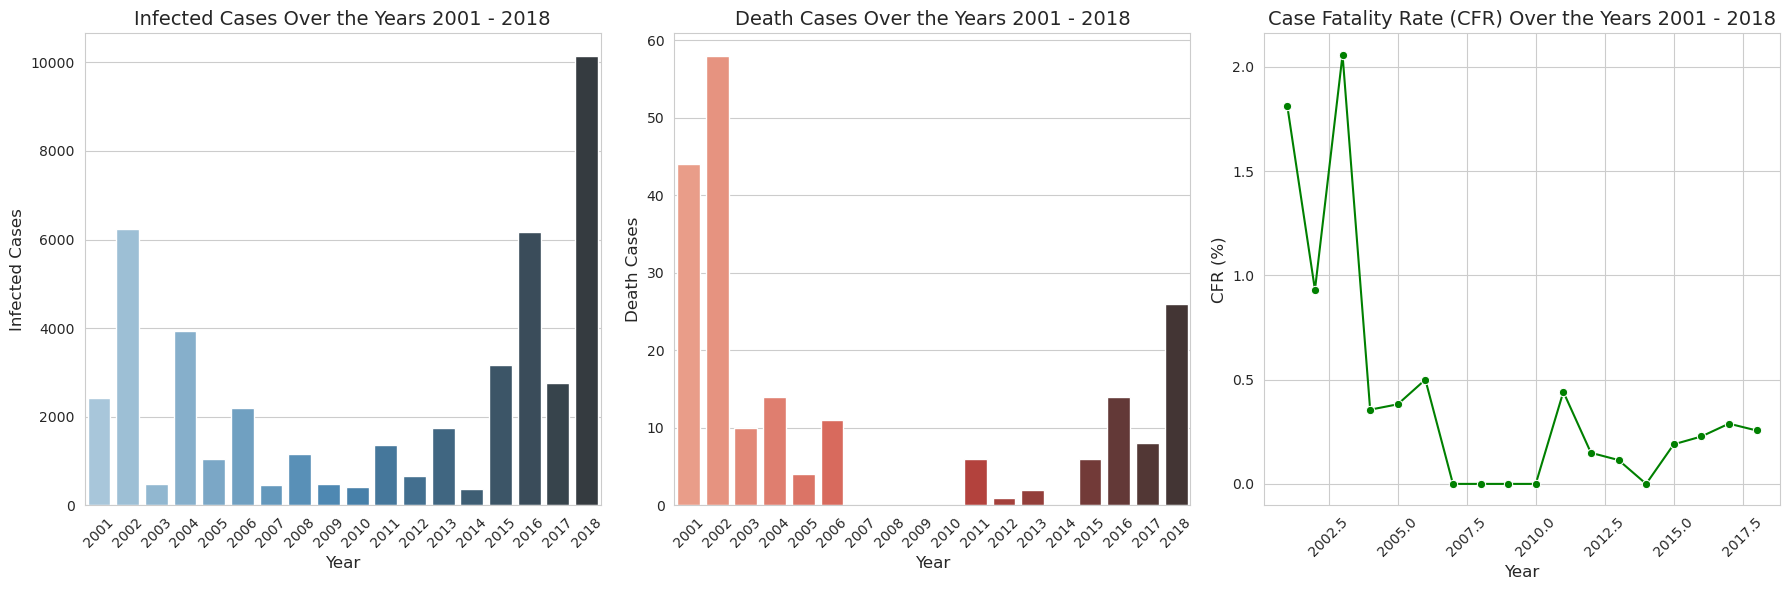

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data by calculating CFR if not already done
data_epidemic['CFR'] = (data_epidemic['Death'] / data_epidemic['Infected']) * 100

# Create a figure with 3 subplots for Infected, Death, and CFR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Infected cases
sns.barplot(data=data_epidemic.reset_index(), x='Year', y='Infected', palette='Blues_d', ax=axes[0])
axes[0].set_title('Infected Cases Over the Years 2001 - 2018', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Infected Cases', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Death cases
sns.barplot(data=data_epidemic.reset_index(), x='Year', y='Death', palette='Reds_d', ax=axes[1])
axes[1].set_title('Death Cases Over the Years 2001 - 2018', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Death Cases', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Line plot for CFR
sns.lineplot(data=data_epidemic.reset_index(), x='Year', y='CFR', marker='o', color='green', ax=axes[2])
axes[2].set_title('Case Fatality Rate (CFR) Over the Years 2001 - 2018', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('CFR (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()


In [14]:
data_epidemic

,Year,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death,CFR
0,2001,136578600,1049,32505706,104072893,33.24,18.28,139.92,2198.86,73.42,25.94,2430,44,1.810700
1,2002,138612896,1065,33960159,104652737,33.44,17.68,156.25,2127.61,73.17,25.82,6232,58,0.930680
2,2003,140647193,1080,35443092,105204100,33.52,18.08,141.08,2159.29,73.67,25.75,486,10,2.057613
3,2004,142681489,1096,36954505,105726983,33.55,18.02,195.58,2112.04,72.67,25.88,3934,14,0.355872
4,2005,144715786,1112,38494399,106221386,33.67,18.73,219.75,2092.13,72.83,26.24,1048,4,0.381679
5,2006,146213025,1123,40033126,106179898,34.62,18.65,159.92,2205.12,71.42,26.47,2200,11,0.500000
6,2007,147710264,1134,41595210,106115053,33.90,18.29,240.42,2246.41,73.17,25.71,466,0,0.000000
7,2008,149207503,1146,43180651,106026851,33.67,18.34,184.75,2384.65,73.42,25.88,1153,0,0.000000
8,2009,150704742,1157,44789449,105915292,34.66,18.68,160.92,2155.83,70.25,26.52,474,0,0.000000
9,2010,152201981,1169,46421604,105780376,34.24,19.12,126.92,2254.19,70.42,26.58,409,0,0.000000


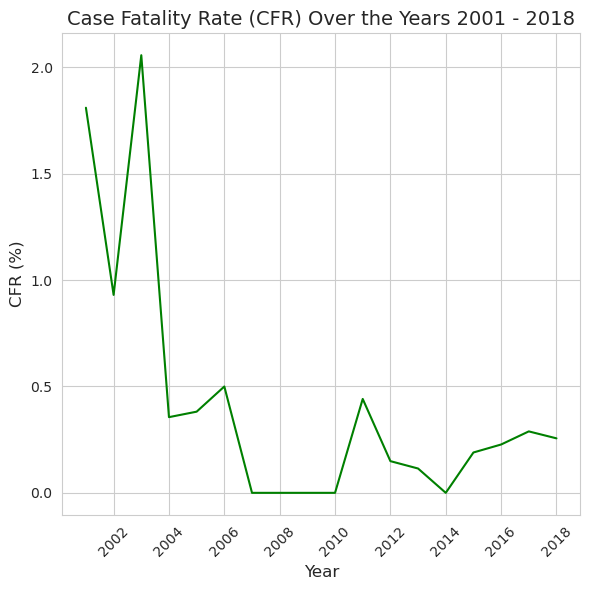

In [15]:
# Line plot for CFR
import matplotlib.ticker as ticker

data_epidemic['CFR'] = (data_epidemic['Death'] / data_epidemic['Infected']) * 100

plt.figure(figsize=(6, 6))
plt.plot(data_epidemic["Year"], data_epidemic["CFR"], color="green")
plt.title("Case Fatality Rate (CFR) Over the Years 2001 - 2018", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CFR (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

# Adjust the layout
plt.tight_layout()
plt.show()

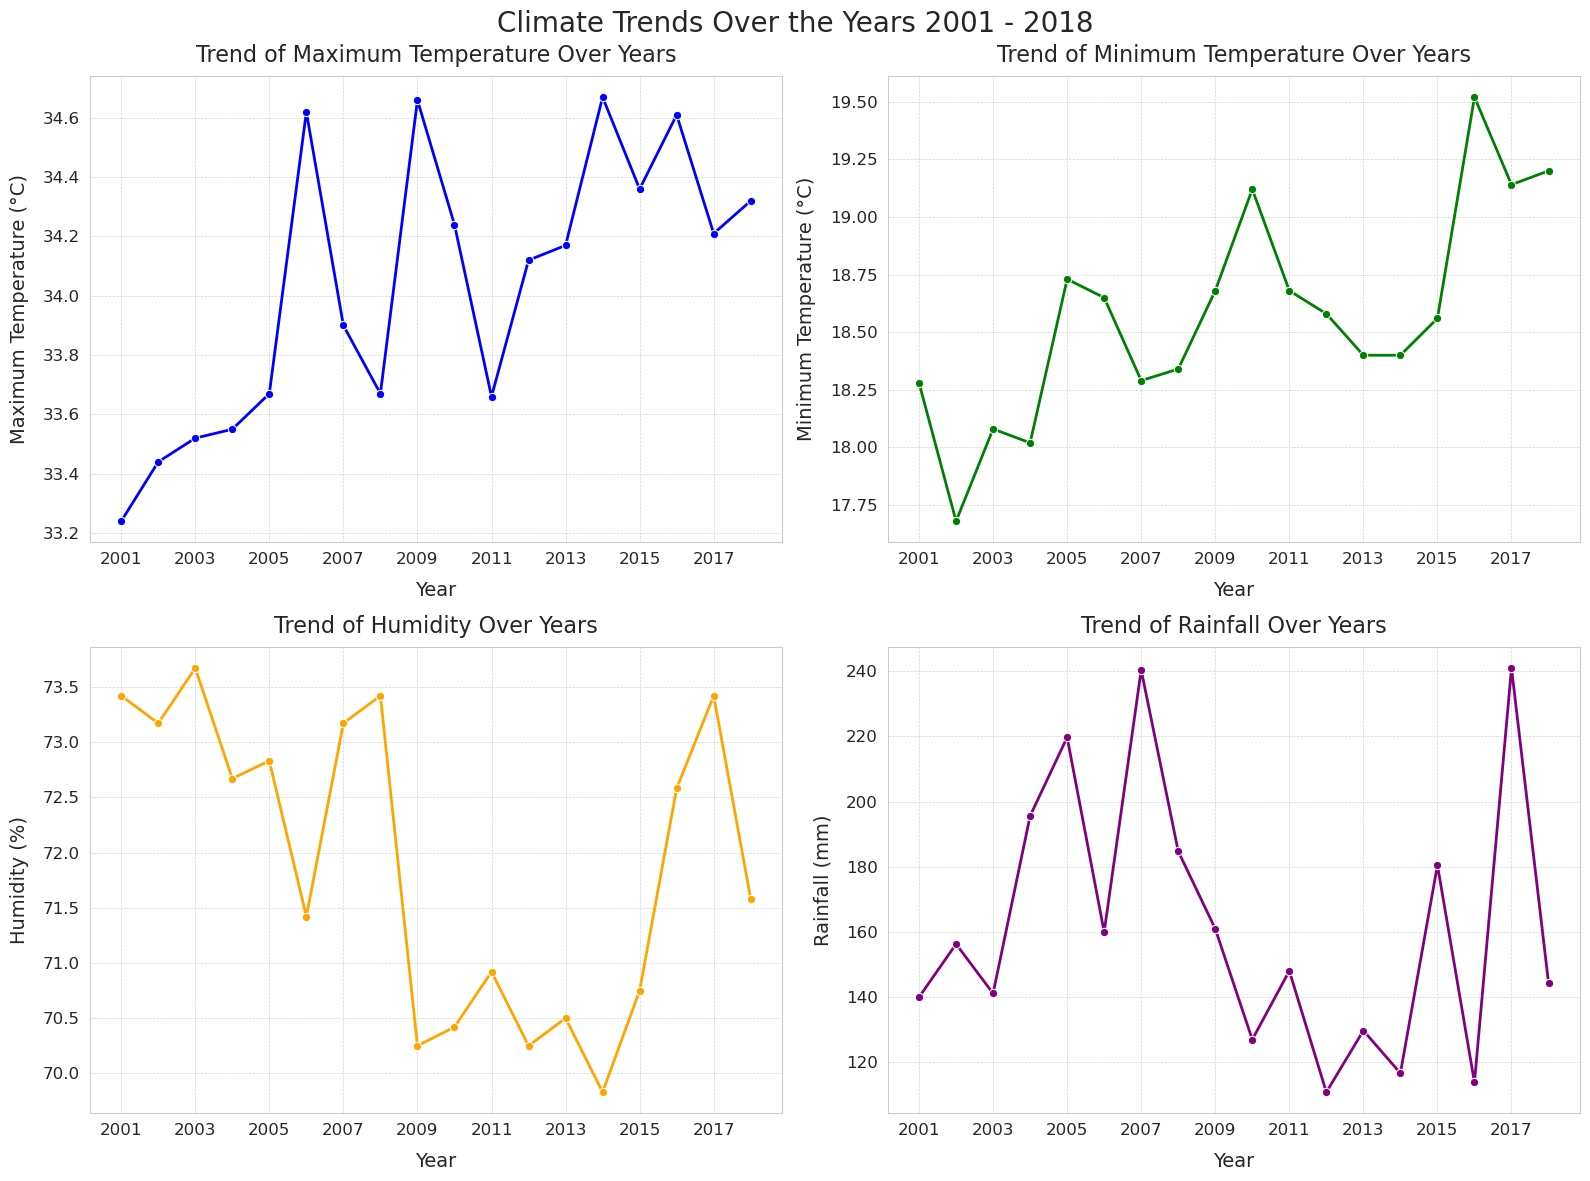

In [16]:
# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set a consistent style
sns.set_style('whitegrid')

# Plot Max T trend
sns.lineplot(
    ax=axes[0, 0],
    x='Year',
    y='Tmax',
    data=data_epidemic,
    color='blue',
    marker='o',
    linewidth=2
)
axes[0, 0].set_title('Trend of Maximum Temperature Over Years', fontsize=16, pad=10)
axes[0, 0].set_xlabel('Year', fontsize=14, labelpad=10)
axes[0, 0].set_ylabel('Maximum Temperature (°C)', fontsize=14, labelpad=10)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)
axes[0, 0].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[0, 0].set_xticks(range(2001, 2019, 2))

# Plot Min T trend
sns.lineplot(
    ax=axes[0, 1],
    x='Year',
    y='Tmin',
    data=data_epidemic,
    color='green',
    marker='o',
    linewidth=2
)
axes[0, 1].set_title('Trend of Minimum Temperature Over Years', fontsize=16, pad=10)
axes[0, 1].set_xlabel('Year', fontsize=14, labelpad=10)
axes[0, 1].set_ylabel('Minimum Temperature (°C)', fontsize=14, labelpad=10)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)
axes[0, 1].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[0, 1].set_xticks(range(2001, 2019, 2))

# Plot Humidity trend
sns.lineplot(
    ax=axes[1, 0],
    x='Year',
    y='Relative Humidity',
    data=data_epidemic,
    color='orange',
    marker='o',
    linewidth=2
)
axes[1, 0].set_title('Trend of Humidity Over Years', fontsize=16, pad=10)
axes[1, 0].set_xlabel('Year', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Humidity (%)', fontsize=14, labelpad=10)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)
axes[1, 0].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[1, 0].set_xticks(range(2001, 2019, 2))

# Plot Rainfall trend
sns.lineplot(
    ax=axes[1, 1],
    x='Year',
    y='Rainfall',
    data=data_epidemic,
    color='purple',
    marker='o',
    linewidth=2
)
axes[1, 1].set_title('Trend of Rainfall Over Years', fontsize=16, pad=10)
axes[1, 1].set_xlabel('Year', fontsize=14, labelpad=10)
axes[1, 1].set_ylabel('Rainfall (mm)', fontsize=14, labelpad=10)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)
axes[1, 1].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[1, 1].set_xticks(range(2001, 2019, 2))

plt.suptitle('Climate Trends Over the Years 2001 - 2018', fontsize=20)

# Adjust layout for better display
plt.tight_layout()

# Display the plots
plt.show()


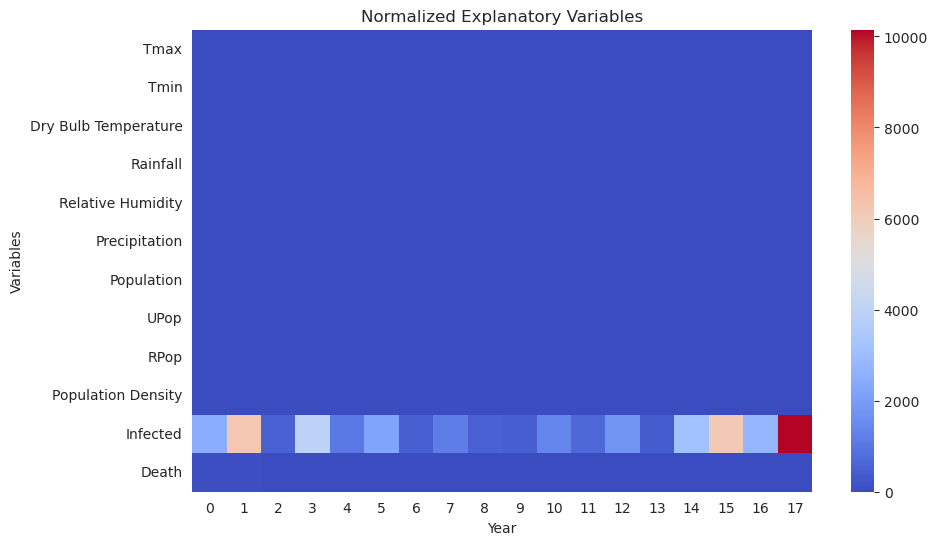

In [17]:
# Normalize the data
normalized_data = data_epidemic[
    [
        "Tmax",
        "Tmin",
        "Dry Bulb Temperature",
        "Rainfall",
        "Relative Humidity",
        "Precipitation",
        "Population",
        "UPop",
        "RPop",
        "Population Density",
    ]
].apply(pd.to_numeric)

# Standardize the data
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Clip extreme values to improve visualization
normalized_data = normalized_data.clip(lower=-3, upper=3)

# Add the Infected and Death columns back for comparison
normalized_data["Infected"] = data_epidemic["Infected"]
normalized_data["Death"] = data_epidemic["Death"]

# Display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of Explanatory Variables and Infections (2001 - 2018)')

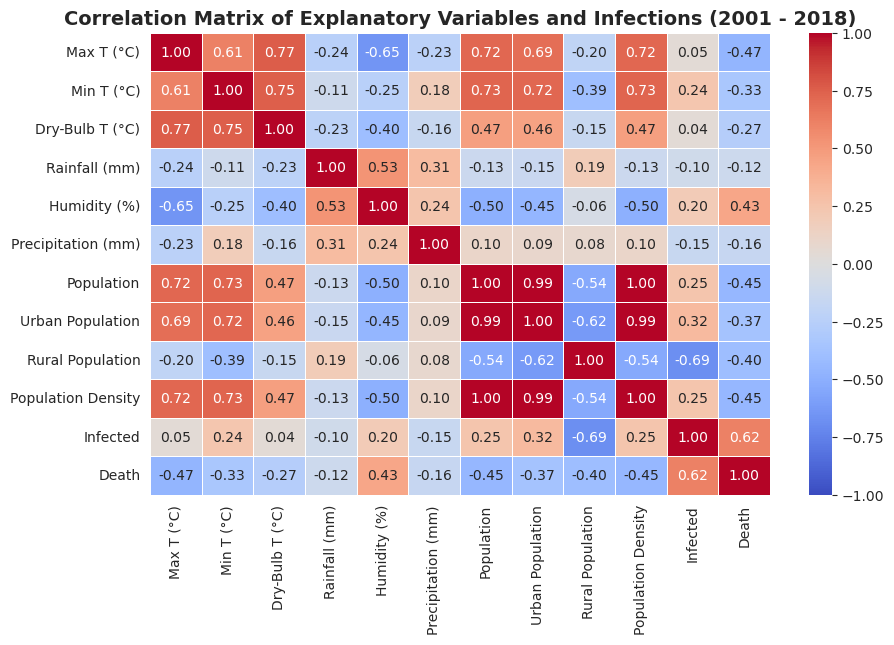

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the mapping for axis label updates
axis_label_map = {
    "Tmax": "Max T (°C)",
    "Tmin": "Min T (°C)",
    "Dry Bulb Temperature": "Dry-Bulb T (°C)",
    "Rainfall": "Rainfall (mm)",
    "Relative Humidity": "Humidity (%)",
    "Precipitation": "Precipitation (mm)",
    "RPop": "Rural Population",
    "UPop": "Urban Population",
    "Population Density": "Population Density"
}

# Step 2: Update correlation matrix labels
correlation_matrix = normalized_data.corr()
correlation_matrix.rename(index=axis_label_map, columns=axis_label_map, inplace=True)

# Step 3: Plot the updated correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Explanatory Variables and Infections (2001 - 2018)", fontsize=14, fontweight="bold")

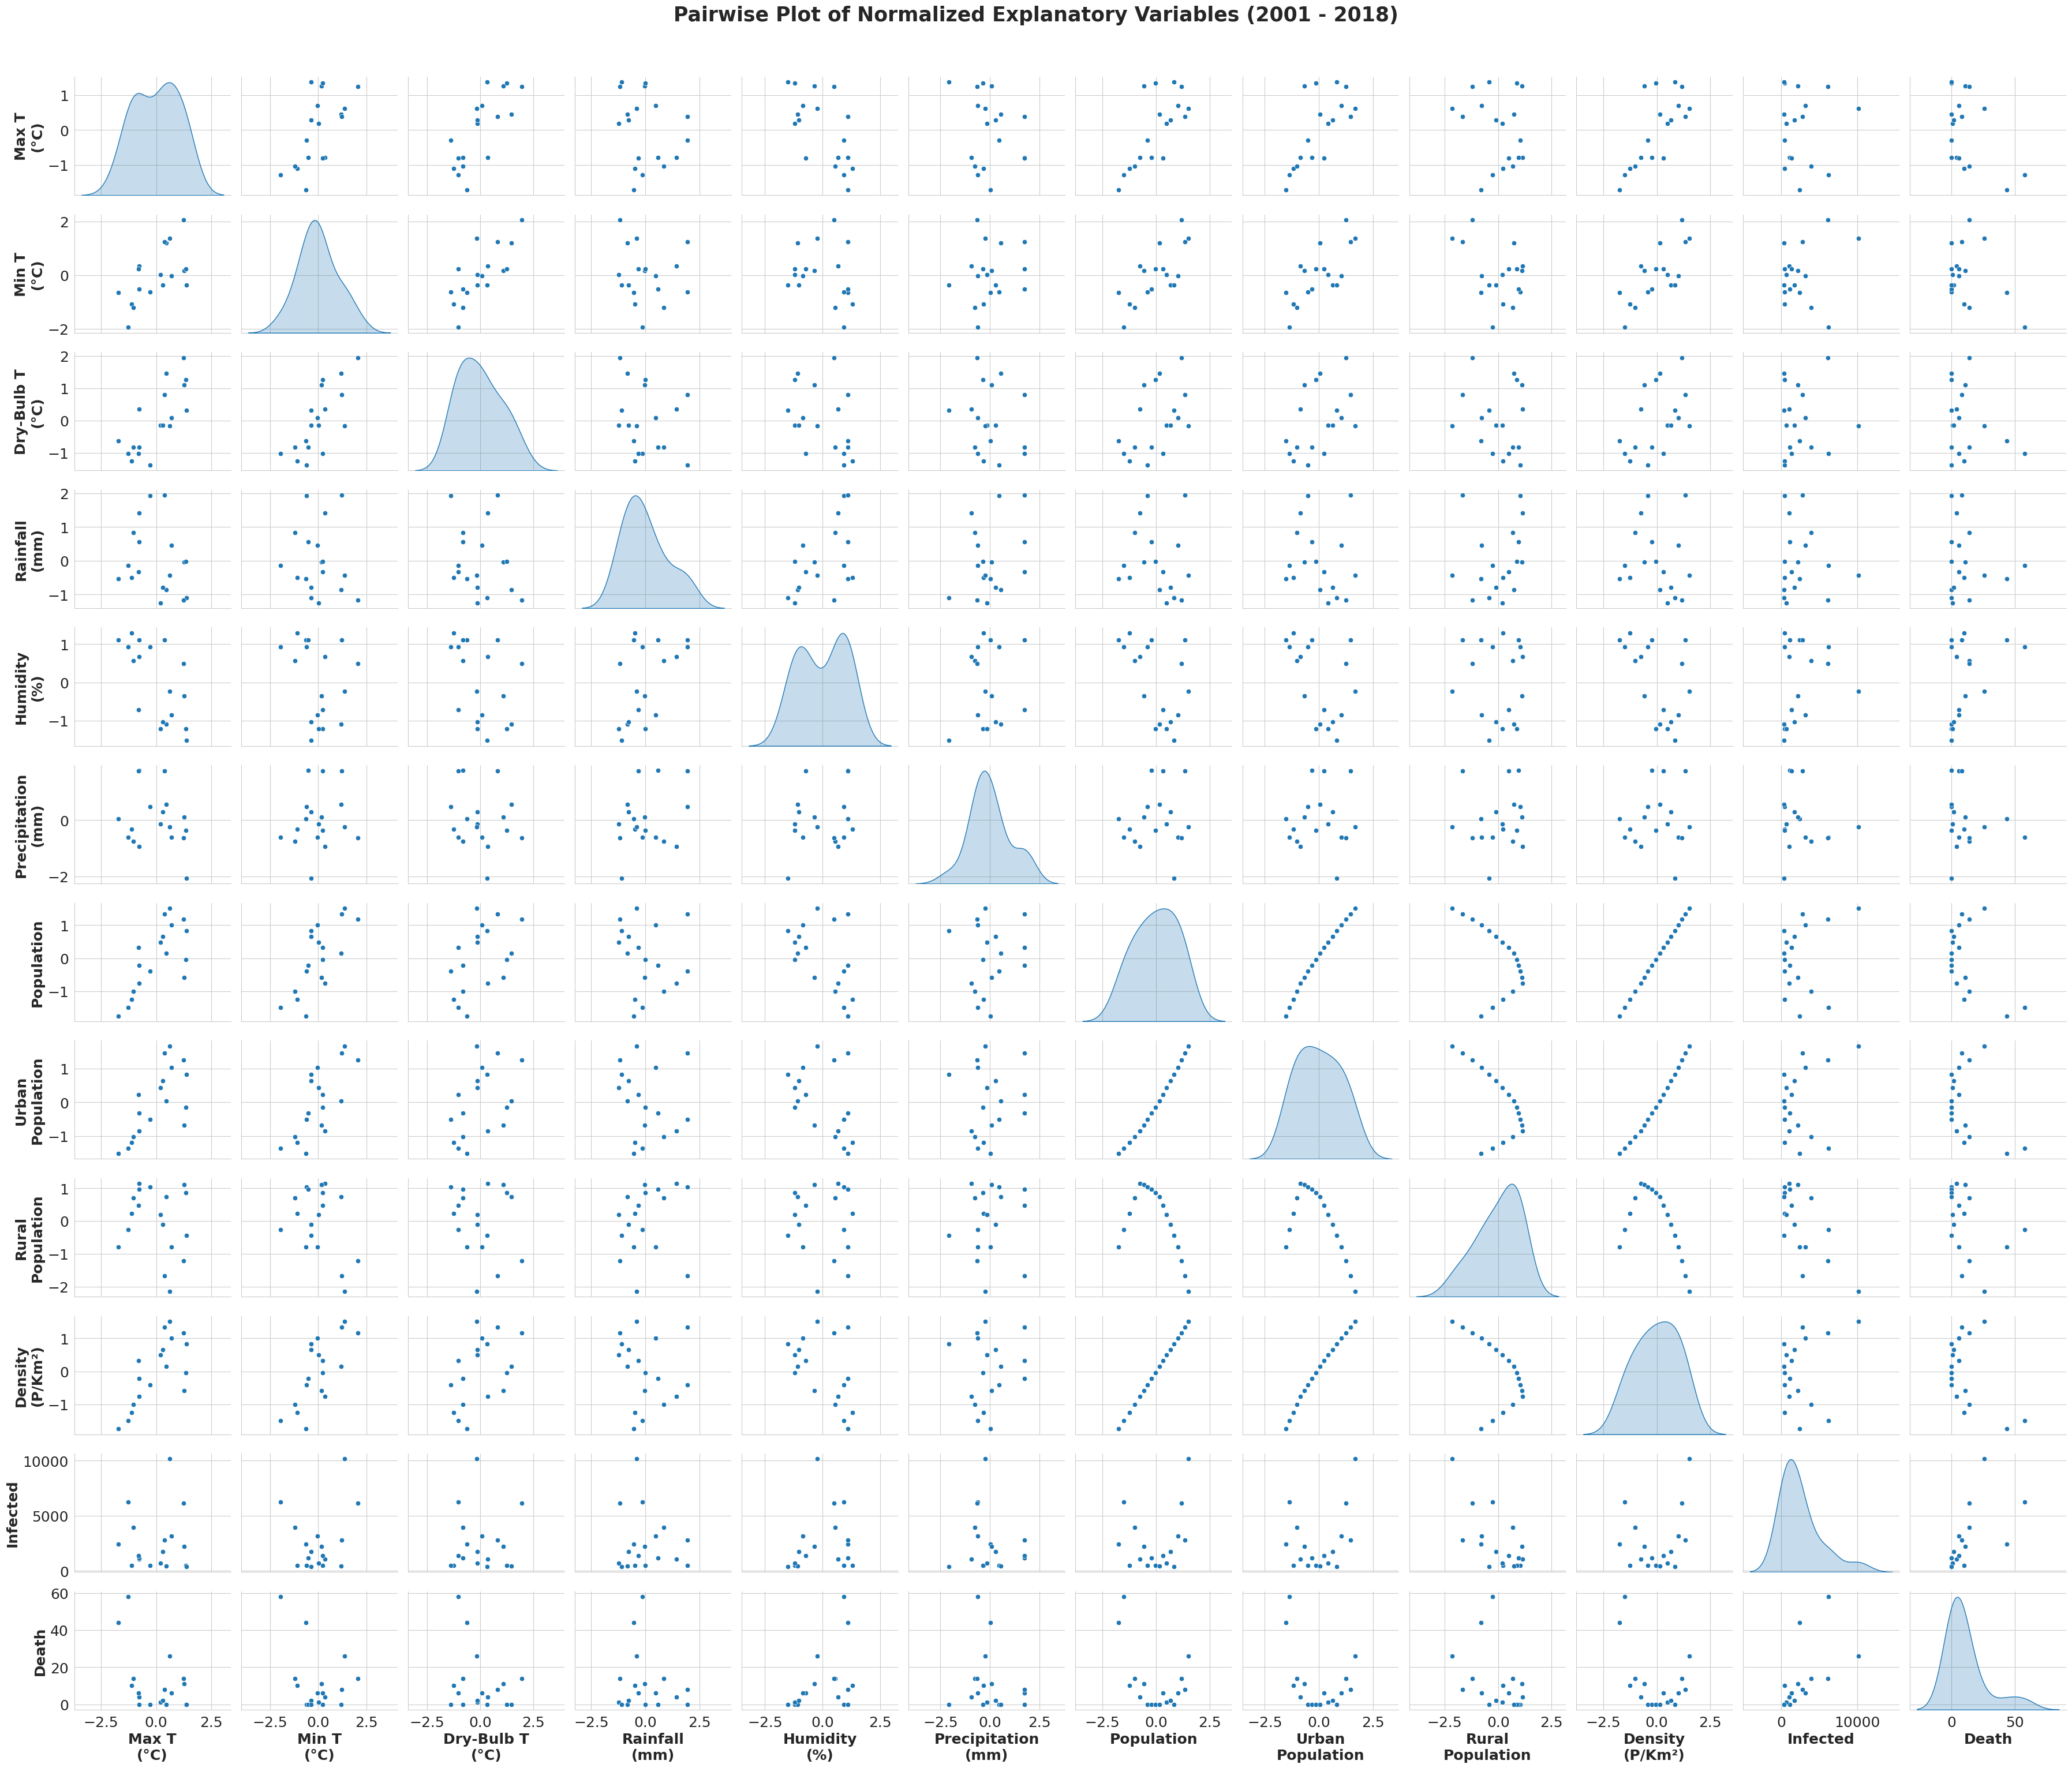

In [22]:
# Create the pairplot
pairplot = sns.pairplot(
    normalized_data, kind="scatter", diag_kind="kde", height=2.5, aspect=1.2
)

# Define a dictionary to update axis labels
axis_label_map = {
    "Tmax": "Max T\n(°C)",
    "Tmin": "Min T\n(°C)",
    "Dry Bulb Temperature": "Dry-Bulb T\n(°C)",
    "Rainfall": "Rainfall\n(mm)",
    "Relative Humidity": "Humidity\n(%)",
    "Precipitation": "Precipitation\n(mm)",
    "RPop": "Rural\nPopulation",
    "UPop": "Urban\nPopulation",
    "Population Density": "Density\n(P/Km²)",
}

# Update axis labels in the pairplot
for ax_row in pairplot.axes:
    for ax in ax_row:
        if ax:  # Check if axis exists
            x_label = ax.get_xlabel()
            y_label = ax.get_ylabel()
            # Update x-axis label if in the map
            if x_label and x_label in axis_label_map:
                ax.set_xlabel(axis_label_map[x_label])
            # Update y-axis label if in the map
            if y_label and y_label in axis_label_map:
                ax.set_ylabel(axis_label_map[y_label])

# # adjust axis limits only for the diagonal plots
# for ax in pairplot.diag_axes:
#     ax.set_xlim(-1, 1)
#     ax.set_ylim(0, 0.5)

for ax in pairplot.axes.flatten():
    if ax:  # Check if axis exists
        ax.set_xlabel(ax.get_xlabel(), fontsize=18, fontweight="bold")
        ax.set_ylabel(ax.get_ylabel(), fontsize=18, fontweight="bold")
        ax.tick_params(axis="both", labelsize=18)  # Increase tick label size

# Add a main title
plt.suptitle(
    "Pairwise Plot of Normalized Explanatory Variables (2001 - 2018)",
    fontsize=25,
    fontweight="bold",
    y=1.02,
)

# Adjust layout for better display
plt.tight_layout()

# Display the pairplot
plt.show()

In [20]:
# Load the data for monthly cases
data = pd.read_excel("./data/Monthly_Infection_2001-2024.xlsx")

data_epidemic_monthly = data[data['Year'] <= 2018]

data_epidemic_monthly.set_index('Year')

,January,February,March,April,May,June,July,August,September,October,November,December,Infected
Year,,,,,,,,,,,,,
2001,0,0,0,0,5,152,310,24,655,514,159,611,2430
2002,0,0,0,0,0,566,3281,0,1713,121,10,541,6232
2003,0,0,0,2,1,4,4,0,3,372,100,0,486
2004,0,0,1,0,1,1209,1261,143,511,395,51,362,3934
2005,1,0,0,0,0,3,174,2,337,187,19,325,1048
2006,0,0,0,0,0,972,680,100,211,92,0,145,2200
2007,0,0,0,0,0,85,179,0,163,0,0,39,466
2008,0,0,0,0,0,0,160,473,334,186,0,0,1153
2009,0,0,0,0,1,0,4,125,188,156,0,0,474


<Figure size 1200x800 with 0 Axes>

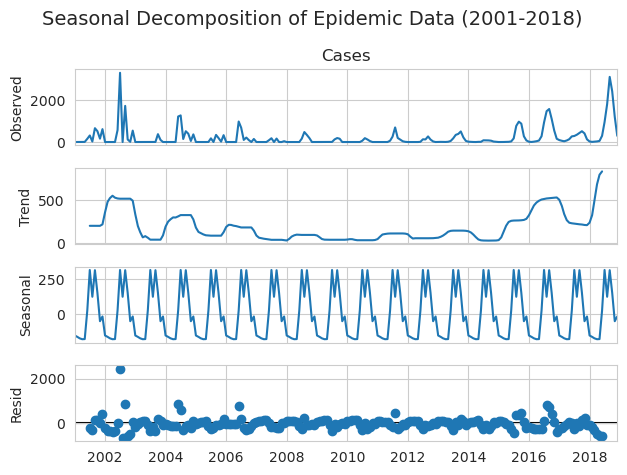

In [21]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
file_path = "./data/Monthly_Infection_2001-2024.xlsx"
data = pd.read_excel(file_path)

# Reshaping the dataset into long format
data_long = data.melt(id_vars=['Year'], 
                      value_vars=['January', 'February', 'March', 'April', 'May', 'June', 
                                  'July', 'August', 'September', 'October', 'November', 'December'],
                      var_name='Month', value_name='Cases')

# Mapping month names to numerical values for time series compatibility
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data_long['Month'] = data_long['Month'].map(month_mapping)

# Creating a datetime column
data_long['Date'] = pd.to_datetime(data_long[['Year', 'Month']].assign(Day=1))

# Sorting data by date
data_long.sort_values('Date', inplace=True)

# Splitting the data into epidemic and endemic periods
data_epidemic_monthly = data_long[data_long['Year'] <= 2018].set_index('Date')
data_endemic_monthly = data_long[data_long['Year'] > 2018].set_index('Date')

# Performing seasonal decomposition for epidemic period
decomposition_epidemic = seasonal_decompose(data_epidemic_monthly['Cases'], model='additive', period=12)

# Plotting the decomposition for the epidemic data
plt.figure(figsize=(12, 8))
decomposition_epidemic.plot()
plt.suptitle('Seasonal Decomposition of Epidemic Data (2001-2018)', fontsize=14)

# Label the y-axis of the first plot
plt.gcf().axes[0].set_ylabel('Observed')

plt.tight_layout()
plt.show()